In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('F:\Car Prediction/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
pip install missingno as msno

ERROR: Could not find a version that satisfies the requirement as (from versions: none)


ERROR: No matching distribution found for as


In [8]:
import missingno as msno

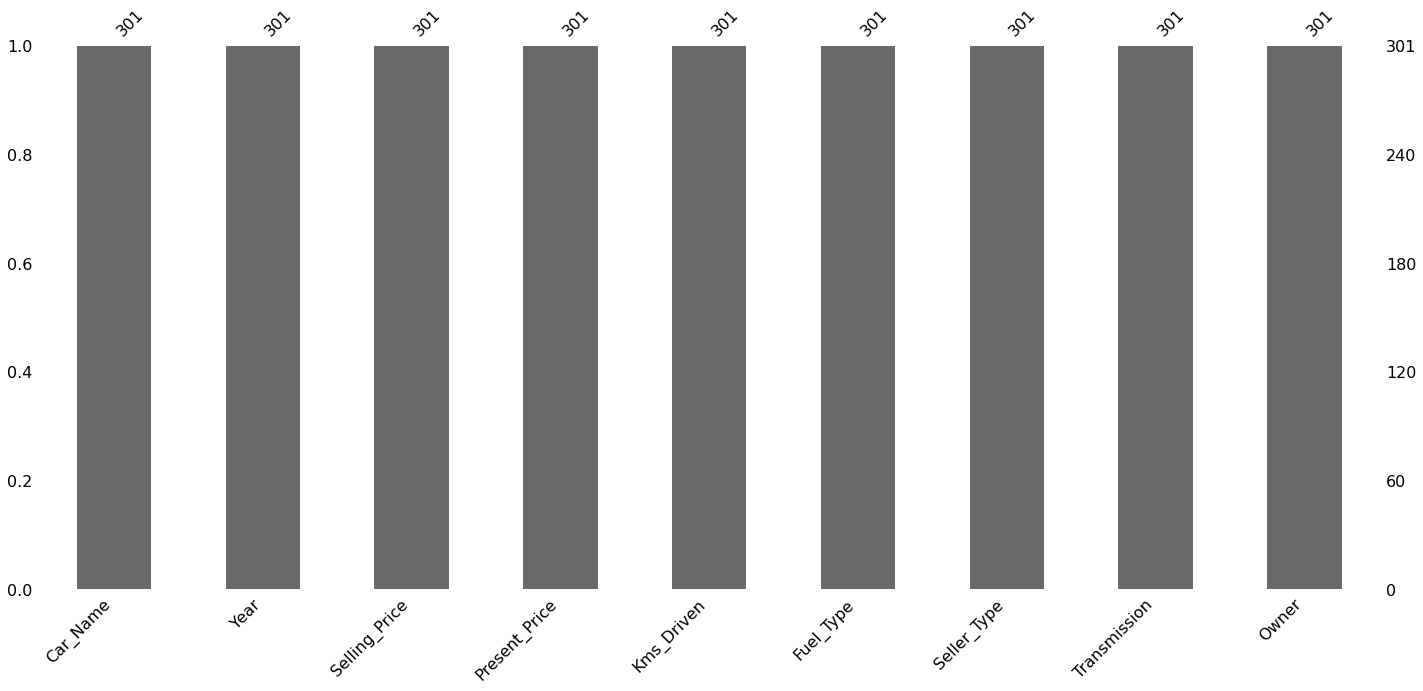

In [9]:
msno.bar(df)
plt.savefig('Missing_Value_Image')

<AxesSubplot:>

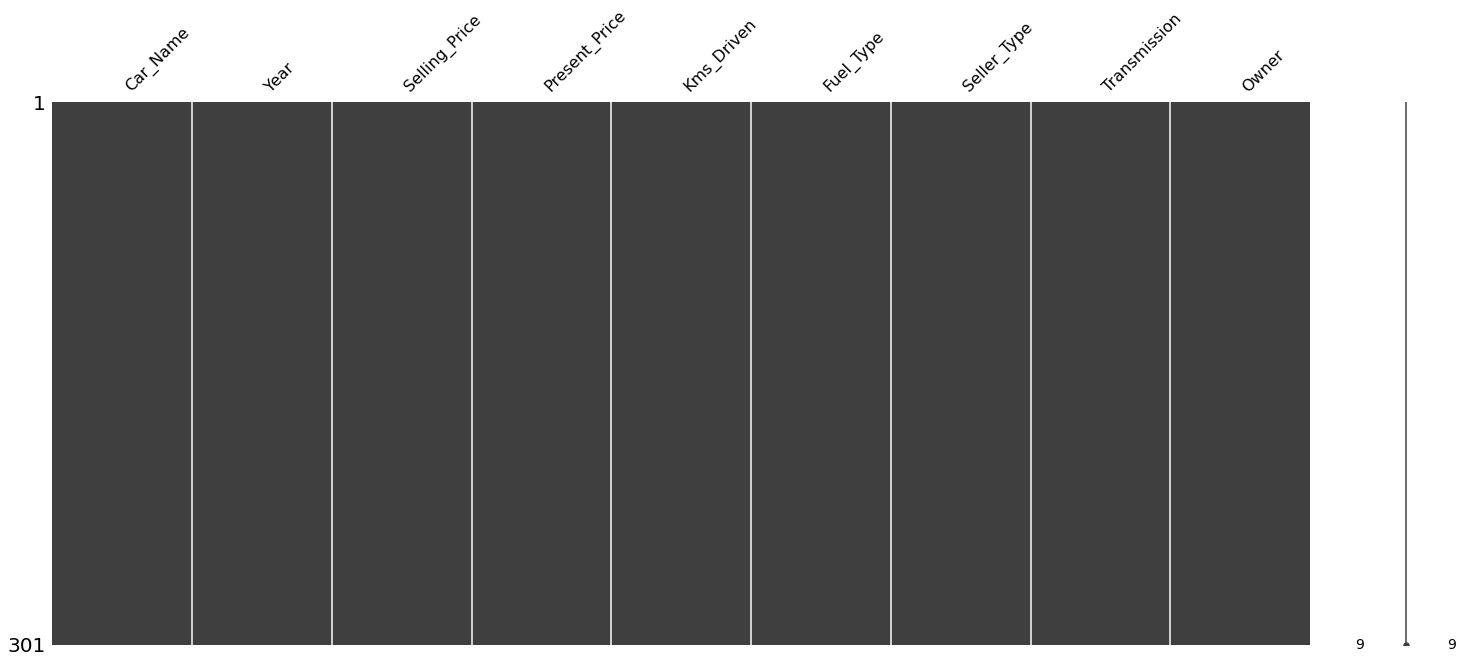

In [10]:
msno.matrix(df)

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
print(df['Seller_Type'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Owner'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df['Current_Year'] = 2020

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
df['No_of_Years'] = df['Current_Year']-df['Year']

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [18]:
df.drop(['Car_Name','Year','Current_Year'],axis = 1,inplace = True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
print(df['Seller_Type'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Owner'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [21]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,0,0,0,0,6
1,4.75,9.54,43000,1,0,0,0,7
2,7.25,9.85,6900,0,0,0,0,3
3,2.85,4.15,5200,0,0,0,0,9
4,4.60,6.87,42450,1,0,0,0,6


In [23]:
correlation = df.corr()

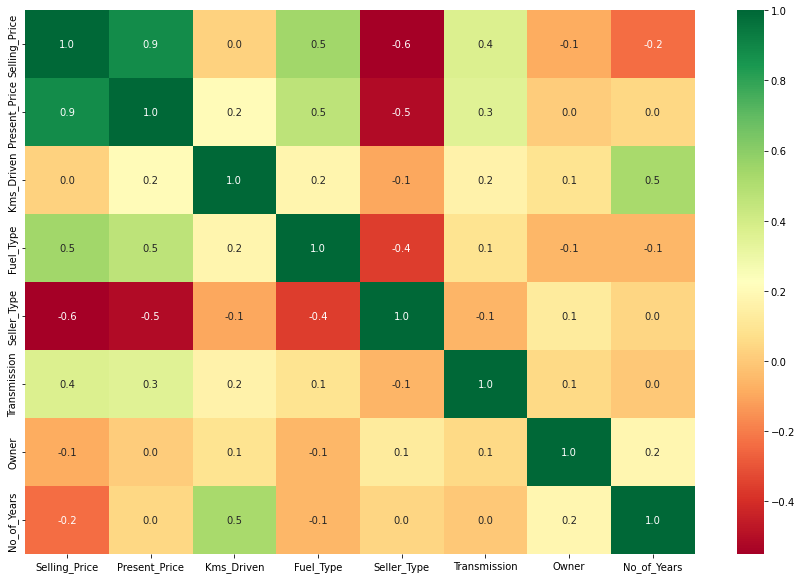

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation,cmap = 'RdYlGn',cbar = True,annot = True,fmt = '.1f')
plt.savefig('Correlation_image')

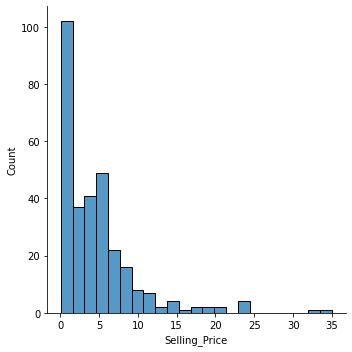

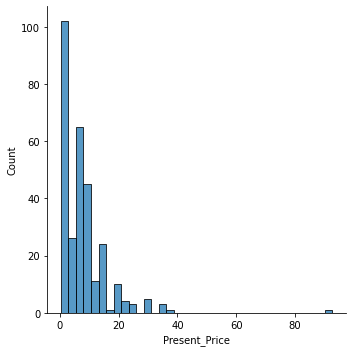

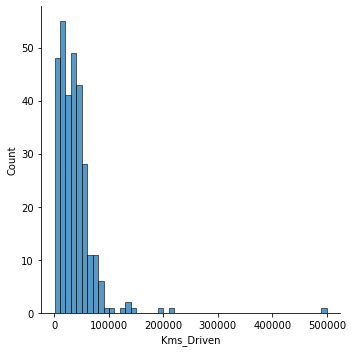

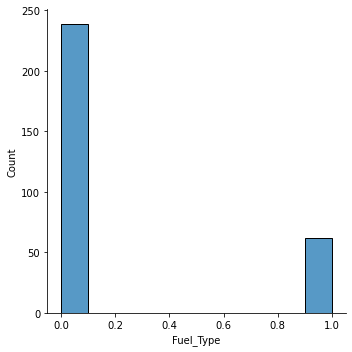

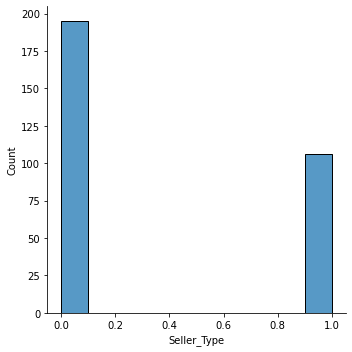

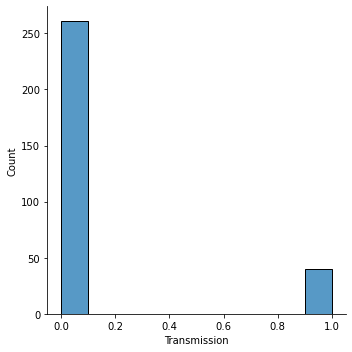

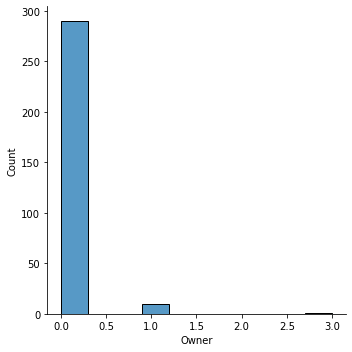

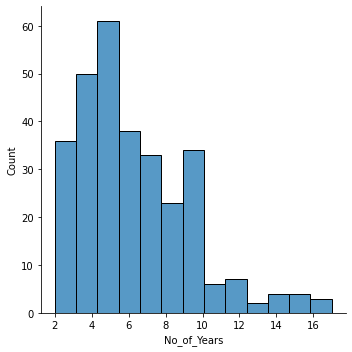

In [25]:
for i in df:
    sns.displot(x = i,data = df,kind = 'hist')

In [26]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,0,0,0,0,6
1,4.75,9.54,43000,1,0,0,0,7
2,7.25,9.85,6900,0,0,0,0,3
3,2.85,4.15,5200,0,0,0,0,9
4,4.60,6.87,42450,1,0,0,0,6


In [27]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_Years'],
      dtype='object')

In [28]:
x = df.drop(['Selling_Price'],axis = 1)
x.shape

(301, 7)

In [29]:
y = df['Selling_Price']
y.shape

(301,)

In [30]:
x.shape,y.shape

((301, 7), (301,))

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[4.32930977e-01 3.84898911e-02 1.34939487e-01 2.40285287e-01
 7.19367826e-02 2.33890297e-04 8.11836856e-02]


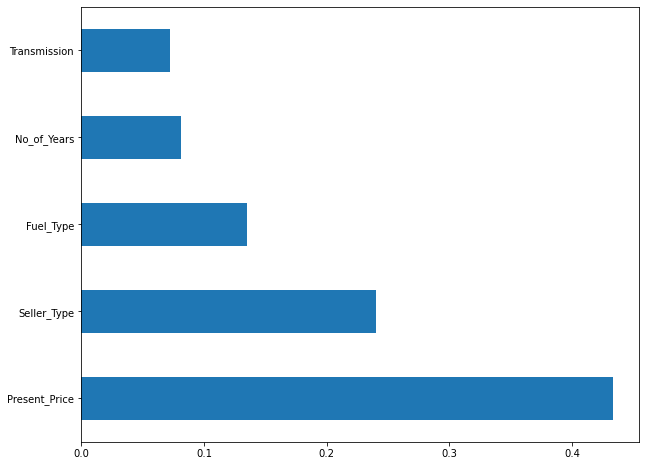

In [32]:
plt.figure(figsize = (10,8))
feature_imp =pd.Series(model.feature_importances_,index = x.columns)
feature_imp.nlargest(5).plot(kind = 'barh')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 192529)

In [34]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [35]:
linear_predictions = linear.predict(x_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
print('R_Score',r2_score(y_test,linear_predictions))

R_Score 0.8745519001643917


Text(0.5, 1.0, 'Predictions of Car Prices')

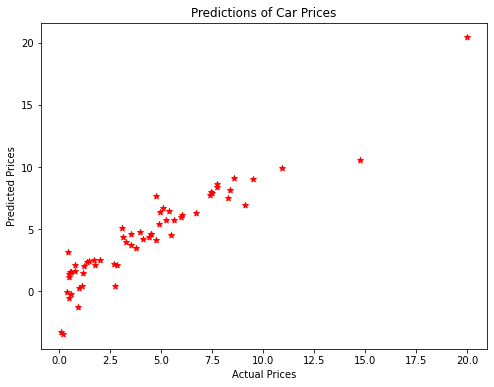

In [38]:
plt.figure(figsize = (8,6))
plt.scatter(y_test,linear_predictions,cmap = True,marker = '*',c = 'Red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predictions of Car Prices')

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

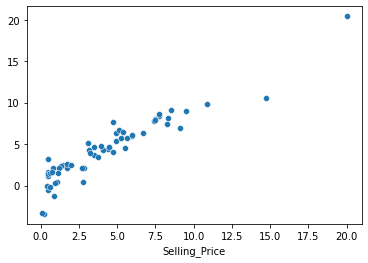

In [39]:
sns.scatterplot(y_test,linear_predictions)

In [40]:
lasso = Lasso()

In [41]:
lasso.fit(x_train,y_train)

Lasso()

In [42]:
lasso_predictions = lasso.predict(x_test)

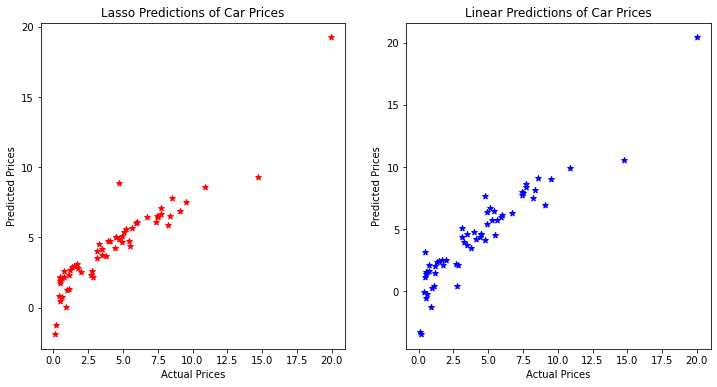

In [43]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(y_test,lasso_predictions,cmap = True,marker = '*',c = 'Red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Predictions of Car Prices')
plt.subplot(1,2,2)
plt.scatter(y_test,linear_predictions,cmap = True,marker = '*',c = 'Blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Predictions of Car Prices')
plt.show()

In [44]:
print('Lasso Regression Accuracy','R_Score',r2_score(y_test,lasso_predictions))
print('Linear Regression Accuracy','R_Score',r2_score(y_test,linear_predictions))

Lasso Regression Accuracy R_Score 0.8588223750913354
Linear Regression Accuracy R_Score 0.8745519001643917
